In [6]:
#Showing directories’ size
import os, shutil

train_dir ='./images/train'
validation_dir = './images/val'
test_dir = './images/test'

train_corona_virus_d = './images/train/Corona_Virus_Disease'
train_normal = './images/train/Normal'
train_tuberculosis= './images/train/Tuberculosis'

val_corona_virus_d = './images/val/Corona_Virus_Disease'
val_normal = './images/val/Normal'
val_tuberculosis= './images/val/Tuberculosis'

test_corona_virus_d = './images/test/Corona_Virus_Disease'
test_normal = './images/test/Normal'
test_tuberculosis= './images/test/Tuberculosis'


print('total train corona virus images:', len(os.listdir(train_corona_virus_d)))
print('total train normal images:', len(os.listdir(train_normal)))
print('total train tuberculosis images:', len(os.listdir(train_tuberculosis)))


print('total validation corona virus images:', len(os.listdir(val_corona_virus_d)))
print('total validation normal images:', len(os.listdir(val_normal)))
print('total validation tuberculosis images:', len(os.listdir(val_tuberculosis)))


print('total testing organic corona virus img:', len(os.listdir(test_corona_virus_d)))
print('total testing recicle normal imgs:', len(os.listdir(test_normal)))
print('total testing recicle tuberculosis img:', len(os.listdir(test_tuberculosis)))

total train corona virus images: 1218
total train normal images: 1207
total train tuberculosis images: 1220
total validation corona virus images: 406
total validation normal images: 402
total validation tuberculosis images: 406
total testing organic corona virus img: 407
total testing recicle normal imgs: 404
total testing recicle tuberculosis img: 408


In [7]:
from keras.utils import image_dataset_from_directory

IMG_SIZE = 150
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    label_mode='categorical',
    seed = 100
)

validation_dataset = image_dataset_from_directory(
    validation_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=64,
    label_mode='categorical',
    seed = 100
)

test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=64,
    label_mode='categorical',
    seed = 100
)

Found 3645 files belonging to 3 classes.
Found 1214 files belonging to 3 classes.
Found 1219 files belonging to 3 classes.


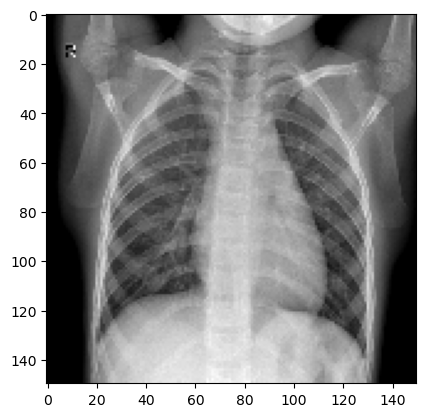

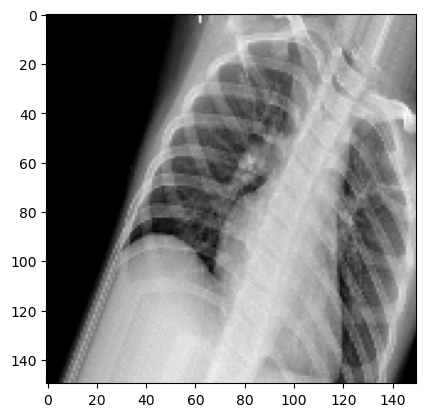

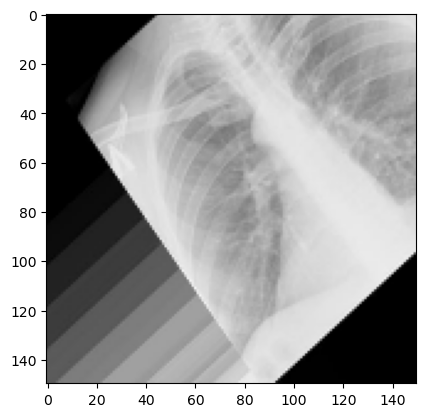

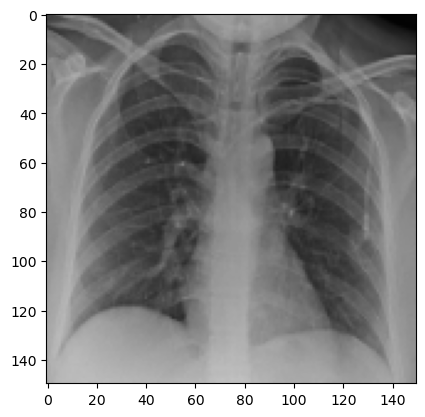

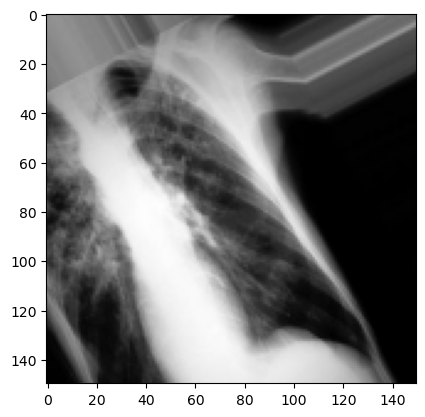

2024-07-01 20:41:52.470926: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [8]:
#Viewing the first 5 images of the first batch
import matplotlib.pyplot as plt
for data_batch, _ in train_dataset.take(1):
    for i in range(5):
        plt.imshow(data_batch[i].numpy().astype("uint8"))
        plt.show()

In [45]:
from tensorflow import keras
from keras import layers
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
        layers.RandomBrightness(0.3, value_range = (0, 255)),
        layers.RandomContrast(0.2)
    ]
)

2024-07-01 21:02:42.796239: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


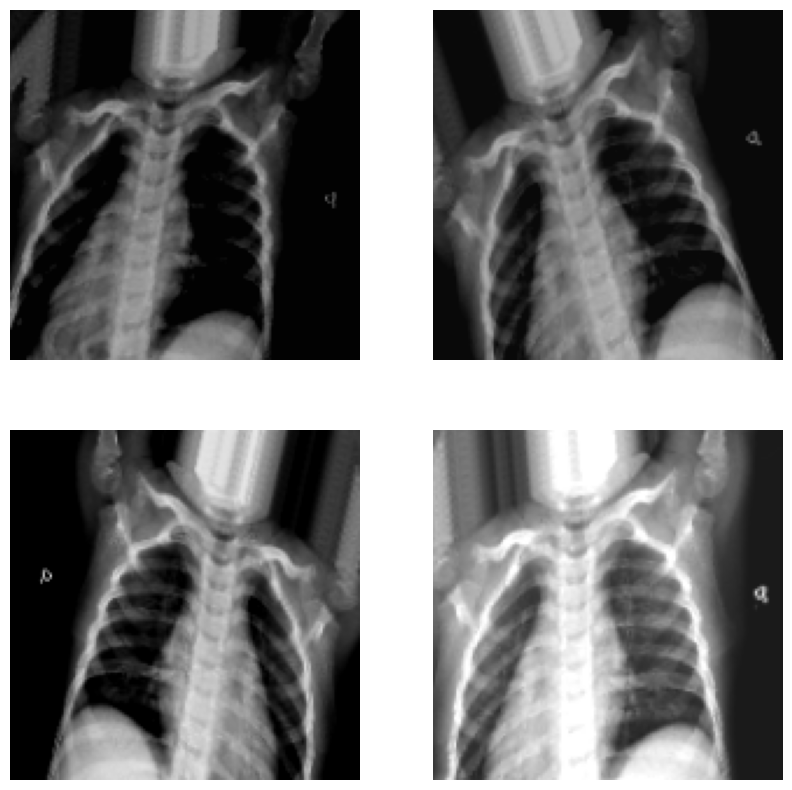

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
  for i in range(4):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [47]:
from tensorflow import keras
from keras import layers
from keras import models
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
# x = layers.Conv2D(filters=32, kernel_size=12, activation="relu")(x)
# x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=32, kernel_size=7, activation="relu")(x)
x = layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True)(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=64, kernel_size=5, activation="relu")(x)
x = layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True)(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=5, activation="relu")(x)
x = layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True)(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True)(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
# x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(2048, activation="relu")(x)
x = layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True)(x)

outputs = layers.Dense(3, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)     │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 144, 144, 32)   │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 144, 144, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 72, 72, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 68, 68, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 68, 68, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 30, 30, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 13, 13, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2048)           │    18,876,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 2048)           │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         6,147 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,448,771 (74.19 MB)

 Trainable params: 19,443,715 (74.17 MB)

 Non-trainable params: 5,056 (19.75 KB)

In [51]:
import tensorflow as tf
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-8),
    metrics=['acc'])

In [52]:
callbacks_list = [
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=10),
    keras.callbacks.ModelCheckpoint(filepath="best_model.keras", save_best_only=True,monitor='val_loss')
]

In [53]:
history = model.fit(
    train_dataset,
    epochs=250,
    validation_data=validation_dataset,
    verbose=1,
    callbacks=callbacks_list
)

Epoch 1/250
114/114 ━━━━━━━━━━━━━━━━━━━━ 26s 201ms/step - acc: 0.3101 - loss: 1.6705 - val_acc: 0.3600 - val_loss: 1.3145
Epoch 2/250
114/114 ━━━━━━━━━━━━━━━━━━━━ 23s 198ms/step - acc: 0.3294 - loss: 1.5978 - val_acc: 0.3682 - val_loss: 1.2949
Epoch 3/250
114/114 ━━━━━━━━━━━━━━━━━━━━ 23s 197ms/step - acc: 0.3229 - loss: 1.6151 - val_acc: 0.3797 - val_loss: 1.2766
Epoch 4/250
114/114 ━━━━━━━━━━━━━━━━━━━━ 23s 197ms/step - acc: 0.3232 - loss: 1.5678 - val_acc: 0.3888 - val_loss: 1.2571
Epoch 5/250
114/114 ━━━━━━━━━━━━━━━━━━━━ 23s 197ms/step - acc: 0.3307 - loss: 1.5769 - val_acc: 0.3995 - val_loss: 1.2312
Epoch 6/250
114/114 ━━━━━━━━━━━━━━━━━━━━ 23s 198ms/step - acc: 0.3237 - loss: 1.5256 - val_acc: 0.4020 - val_loss: 1.2141
Epoch 7/250
114/114 ━━━━━━━━━━━━━━━━━━━━ 23s 197ms/step - acc: 0.3539 - loss: 1.5122 - val_acc: 0.4160 - val_loss: 1.1951
Epoch 8/250
114/114 ━━━━━━━━━━━━━━━━━━━━ 23s 198ms/step - acc: 0.3498 - loss: 1.5140 - val_acc: 0.4201 - val_loss: 1.1759
Epoch 9/250
114/114 ━━━━

In [54]:
model.save('./BestModel_WithDataAugmentation_xray_114.keras')

In [57]:
keras.models.load_model('./BestModel_WithDataAugmentation_xray_114.keras')

<Functional name=functional_17, built=True>

In [58]:
val_loss, val_acc = model.evaluate(validation_dataset)
print('val_acc:', val_acc)

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - acc: 0.7926 - loss: 0.4862
val_acc: 0.8097199201583862


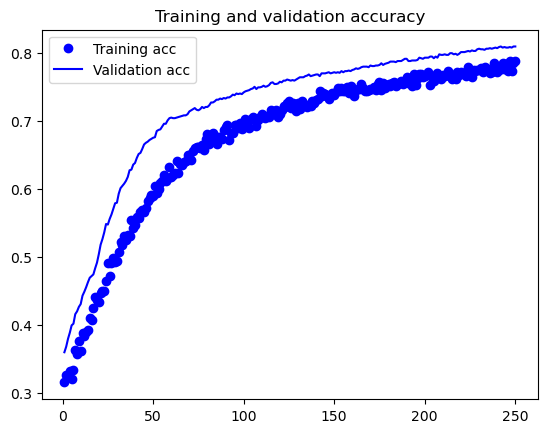

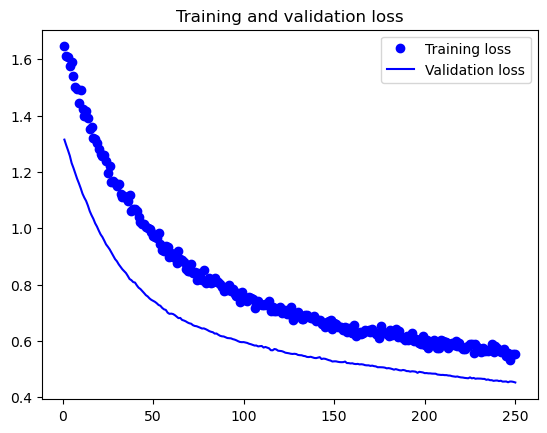

In [59]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [60]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical

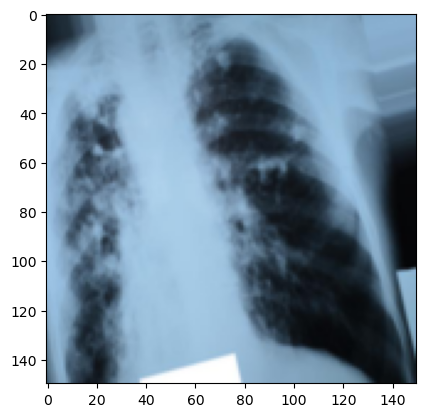

(1, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Class index: [2]
One-hot encoded prediction: [[0. 0. 1.]]


In [62]:
# img = tf.keras.preprocessing.image.load_img('./train/cats/cat.1.jpg', target_size=(150, 150), interpolation='bilinear')
img = tf.keras.preprocessing.image.load_img('images/val/Tuberculosis/test_0_274.jpeg', target_size=(150, 150), interpolation='bilinear')
plt.imshow(img)
plt.show()
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
print(img_array.shape)
result = model.predict(img_array)

# Convert prediction to class index (0, 1, 2)
class_index = np.argmax(result, axis=1)

# Convert class index to one-hot encoded vector
one_hot_prediction = to_categorical(class_index, num_classes=3)

# Print the result
print("Class index:", class_index)
print("One-hot encoded prediction:", one_hot_prediction)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


2024-07-01 22:55:38.626801: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


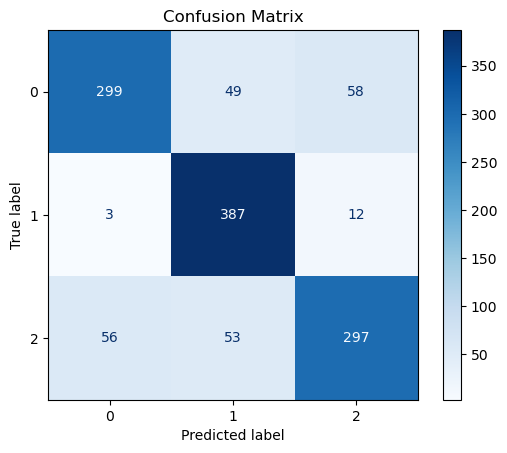

Classification Report:
                       precision    recall  f1-score   support

Corona_Virus_Disease       0.84      0.74      0.78       406
              Normal       0.79      0.96      0.87       402
        Tuberculosis       0.81      0.73      0.77       406

            accuracy                           0.81      1214
           macro avg       0.81      0.81      0.81      1214
        weighted avg       0.81      0.81      0.81      1214



In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


# Inicializar listas para almacenar etiquetas verdaderas y predicciones
true_labels = []
predictions = []

# Iterar a través del conjunto de validación y predecir
for images, labels in validation_dataset:
    preds = model.predict(images)
    predictions.extend(preds)
    true_labels.extend(labels.numpy())

# Convertir las listas a arrays de numpy
predictions = np.array(predictions)
true_labels = np.array(true_labels)

# Si las etiquetas verdaderas están en formato one-hot encoded, convertirlas a etiquetas enteras
if true_labels.ndim == 2 and true_labels.shape[1] > 1:
    true_labels_int = np.argmax(true_labels, axis=1)
else:
    true_labels_int = true_labels

# Asegurarse de que las predicciones son probabilidades y luego convertirlas a etiquetas enteras
predictions_int = np.argmax(predictions, axis=1)

# Crear la matriz de confusión
cm = confusion_matrix(true_labels_int, predictions_int)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Generar y mostrar el reporte de clasificación
report = classification_report(true_labels_int, predictions_int, target_names=validation_dataset.class_names)
print("Classification Report:\n", report)